In [1]:
import numpy as np
import matplotlib.pyplot as plt
from aeons.utils import *
from aeons.endpoint import EndModel
from aeons.plotting import *
from aeons.toy_samples import cauchy_samples
from aeons.regress import params_from_d
figsettings()

In [59]:
name, samples = get_samples('toy', 'cauchy_84')
model = EndModel(samples)
true_endpoint = model.true_endpoint()
true_logXf = model.true_logXf()

In [60]:
iterations = make_iterations(true_endpoint, 25)
logXfs = np.zeros(len(iterations))
logXfs_std = np.zeros(len(iterations))
Nset = 25
for i, ndead in enumerate(iterations):
    logL, X_mean, nk, logZdead = model.data(ndead)
    points = points_at_iteration(samples, ndead)
    beta = get_beta(points, ndead)
    # beta = find_betadone(points, ndead)[0]
    points = points.set_beta(beta)
    d_Gs = points.d_G(25).values
    logXf_set = np.zeros(Nset)
    for j in range(Nset):
        X = generate_Xs(nk)
        # Pick a random element from the array of d_G
        d_G = d_Gs[np.random.randint(len(d_Gs))]
        theta = params_from_d(logL[ndead:], X[ndead:], d_G)
        logXf_set[j] = logXf_formula(theta, logZdead, X_mean[ndead])
    logXf_set = logXf_set[~np.isnan(logXf_set)]
    logXfs[i] = np.mean(logXf_set)
    logXfs_std[i] = np.std(logXf_set)
    # Print progress bar
    print('\r', f"Iteration {ndead} of {iterations[-1]}", end='')

 Iteration 37744 of 37744

In [61]:
write_to_txt(f'{aeons_dir}/data/predictions/cauchy/cauchy_84.txt', [iterations, logXfs, logXfs_std, true_endpoint])

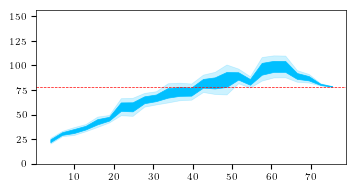

In [62]:
logXs = samples.logX().iloc[iterations]
plot_std(-logXs, -logXfs, logXfs_std, -true_logXf, ylim=(0, 2))

Text(0.06, 0.5, '$-\\log \\hat{X_\\mathrm{f}}$')

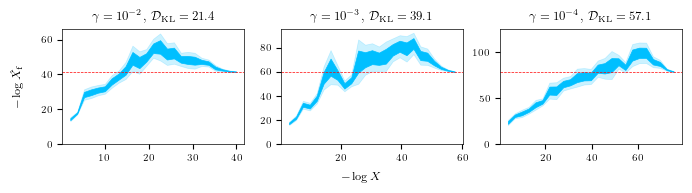

In [74]:
fig, axs = plt.subplots(1, 3, figsize=(8, 1.5))
for i, exp in enumerate([2, 3, 4]):
    ax = axs[i]
    name, samples = get_samples('toy', f'cauchy_8{exp}')
    iterations, logXfs, logXfs_std, true_endpoint = read_from_txt(f'{aeons_dir}/data/predictions/cauchy/cauchy_8{exp}.txt')
    logXs = samples.logX().iloc[iterations]
    logXf_true = samples.logX().iloc[int(true_endpoint[0])]
    plot_std(-logXs, -logXfs, logXfs_std, -logXf_true, ylim=(0, 1.6), color='deepskyblue', ax=ax)
    ax.set_title(f'$\\gamma=10^{{{-exp}}}$, $\\mathcal{{D}}_\\mathrm{{KL}} = {samples.D_KL():.1f}$')

fig.supxlabel('$-\\log X$', y=-0.15)
fig.supylabel('$-\\log \\hat{X_\\mathrm{f}}$', x=0.06)